In [2]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot', OrdinalEncoder())
])

numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
num_attribs = list(numerical_data)
cat_attribs = list(categorical_data)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [11]:
data_prepared = full_pipeline.fit_transform(data)

In [12]:
data_prepared.shape

(7043, 21)

In [69]:
data_prepared[:5]

array([[-4.39916493e-01, -1.27744458e+00, -1.16032292e+00,
         5.37500000e+03,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  2.50500000e+03,  0.00000000e+00],
       [-4.39916493e-01,  6.63274191e-02, -2.59628942e-01,
         3.96200000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         3.00000000e+00,  1.46600000e+03,  0.00000000e+00],
       [-4.39916493e-01, -1.23672422e+00, -3.62660356e-01,
         2.56400000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e

In [16]:
import matplotlib.pyplot as plt

def nice_scatterplot(x, y, title):
    # font size
    f_size = 18

    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)

    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)

    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)

    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);

    return ax

# Student Hours Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
def load_student_hours_data():
    X_train = pd.read_csv('student_hours.csv')
    y_train = np.array(X_train['Scores'])
    X_train = np.array(X_train['Hours'])
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

In [45]:
X_train, y_train, X_test, y_test = load_student_hours_data()

<Axes: title={'center': 'Hours vs Scores'}, xlabel='$x$', ylabel='$y$'>

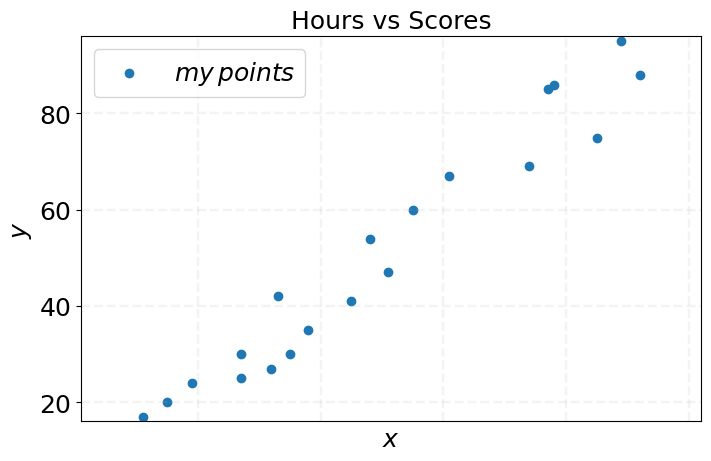

In [46]:
nice_scatterplot(X_train, y_train, 'Hours vs Scores')

In [49]:
def preprocess_student_hours_data(X_train, X_test):
    X_train = StandardScaler().fit_transform(X_train.reshape(-1, 1))
    X_test = StandardScaler().fit_transform(X_test.reshape(-1, 1))
    return X_train, X_test

In [50]:
X_train, X_test = preprocess_student_hours_data(X_train, X_test)

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [58]:
print("Train Score: " + str(lin_reg.score(X_train, y_train)))
print("Test Score: " + str(lin_reg.score(X_test, y_test)))

Train Score: 0.9491209376364416
Test Score: 0.9537535801932034


In [59]:
def plot_linear_regression(X, y, lin_reg):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg.predict(X), color = 'blue')
    plt.title('Hours vs Scores')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.show()

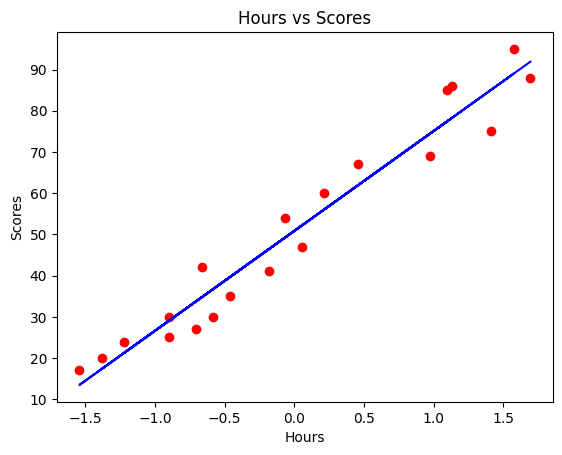

In [60]:
plot_linear_regression(X_train, y_train, lin_reg)

# L2, L1, ElasticNet Regularization

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.95


In [64]:

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.95


In [65]:

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)

print(f"ElasticNet-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"ElasticNet-Test set score: {elastic_net.score(X_test, y_test):.2f}")

ElasticNet-Training set score: 0.95
ElasticNet-Test set score: 0.95
